In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.vae_model import vae_model
from src.visualization import plot_latent_space_with_tsne, plot_loss_history, plot_voxel
from src.voxel_util import (
    gen_voxel_ball_data,
    gen_voxel_brick_data,
    random_voxel_ball,
    random_voxel_brick,
)
from tensorflow.keras.optimizers import Adam

2023-12-22 09:37:51.967002: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 09:37:52.056123: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 09:37:52.402837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 09:37:52.402882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 09:37:52.443960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# sources
# https://github.com/IsaacGuan/3D-VAE/blob/master/train.py
# https://github.com/ffriese/voxel_vae/tree/master
# https://github.com/ajbrock/Generative-and-Discriminative-Voxel-Modeling/blob/master/Generative/VAE.py

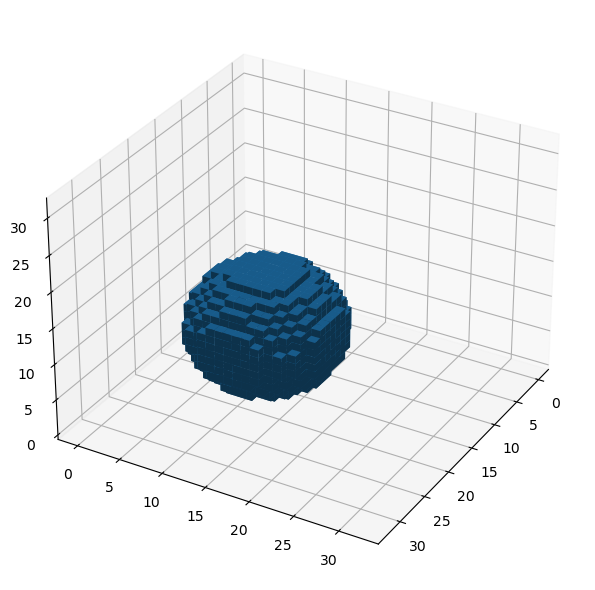

In [3]:
ball = True
if ball:
    d = 8
    plot_voxel(random_voxel_ball(d=d))
else:
    d_xyz = [5, 5, 5]
    plot_voxel(random_voxel_brick(d_xyz=d_xyz))

In [4]:
n_gammas = 500
if ball:
    gamma_train = gen_voxel_ball_data(num=n_gammas, d=d)
else:
    gamma_train = gen_voxel_brick_data(num=n_gammas, d_xyz=d_xyz)

print(gamma_train.shape)

(500, 32, 32, 32, 1)


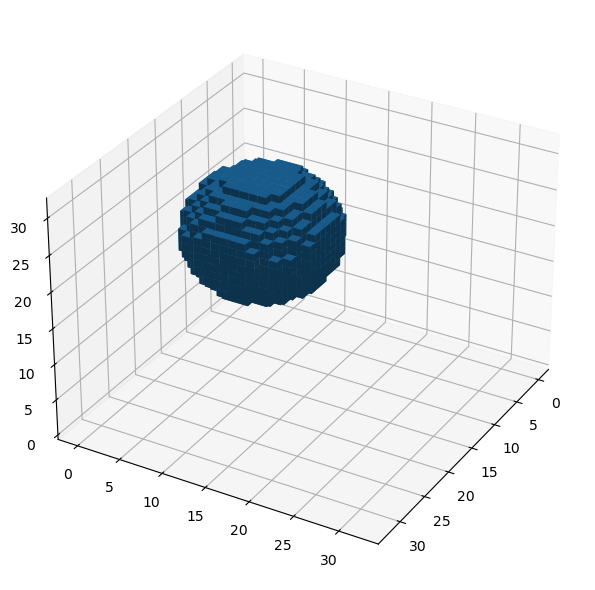

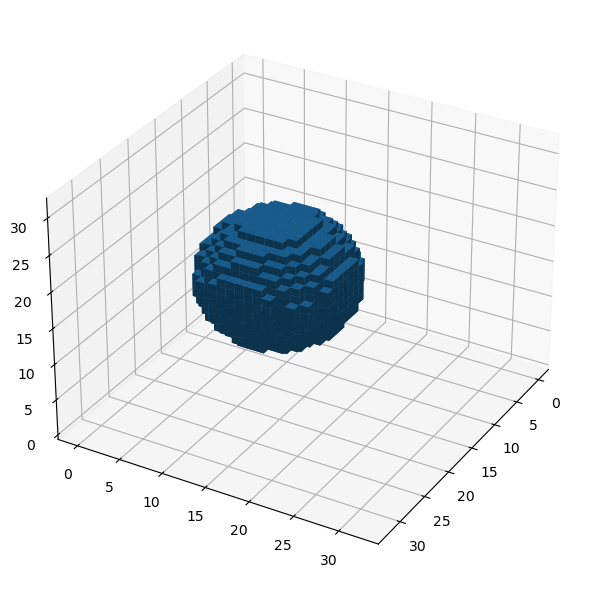

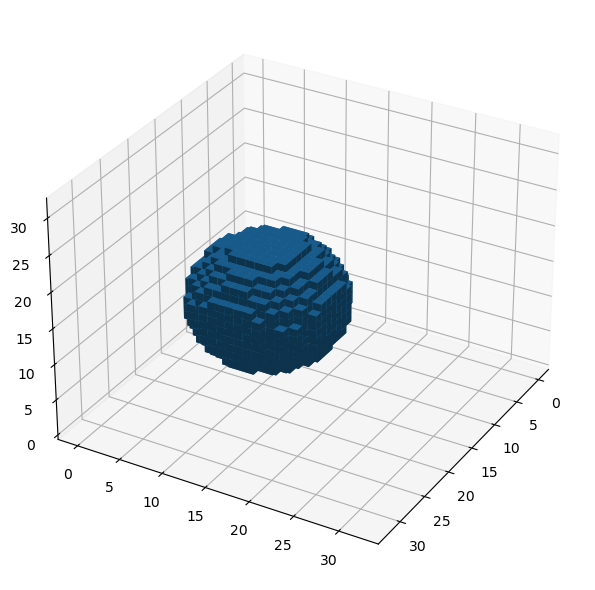

In [5]:
ns = 100
for idx in np.random.randint(0, ns, size=3):
    plot_voxel(gamma_train[idx, :, :, :, 0])

In [6]:
vae = vae_model(
    input_shape=(32, 32, 32, 1),
)
vae.compile(optimizer=Adam())

2023-12-22 09:38:09.931257: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
epoch_num = 250
batch_size = 100

history = vae.fit(gamma_train, epochs=epoch_num, batch_size=batch_size)
# callbacks = [LearningRateScheduler(learning_rate_scheduler)]

Epoch 1/250
5/5 [==============================] - 4s 238ms/step - loss: 15954.4364 - reconstruction_loss: 12873.5020 - kl_loss: 0.0227
Epoch 2/250
5/5 [==============================] - 1s 220ms/step - loss: 7898.3262 - reconstruction_loss: 7791.9629 - kl_loss: 0.0278
Epoch 3/250
5/5 [==============================] - 1s 225ms/step - loss: 7558.0374 - reconstruction_loss: 7556.6431 - kl_loss: 0.0330
Epoch 4/250
5/5 [==============================] - 1s 224ms/step - loss: 7608.1616 - reconstruction_loss: 7623.7998 - kl_loss: 0.0368
Epoch 5/250
5/5 [==============================] - 1s 222ms/step - loss: 7689.0753 - reconstruction_loss: 7693.8281 - kl_loss: 0.0395
Epoch 6/250
5/5 [==============================] - 1s 223ms/step - loss: 7690.1801 - reconstruction_loss: 7682.6616 - kl_loss: 0.0414
Epoch 7/250
5/5 [==============================] - 1s 233ms/step - loss: 7636.0961 - reconstruction_loss: 7625.3936 - kl_loss: 0.0430
Epoch 8/250
5/5 [==============================] - 1s 222ms/

In [8]:
history.history.keys()

dict_keys(['loss', 'reconstruction_loss', 'kl_loss'])

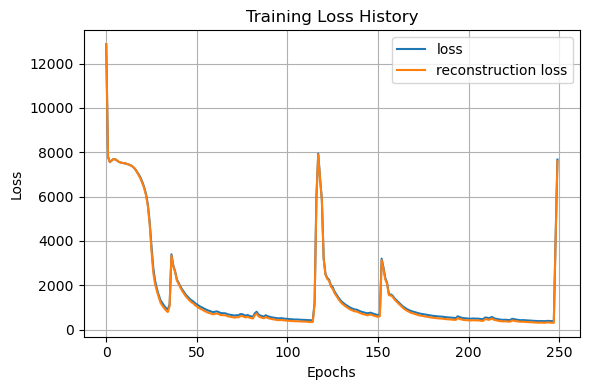

In [9]:
plot_loss_history(history)

In [10]:
if ball:
    gamma_test = gen_voxel_ball_data(num=100, d=d)
else:
    gamma_test = gen_voxel_brick_data(num=100, d_xyz=d_xyz)

4/4 [==============================] - 0s 14ms/step


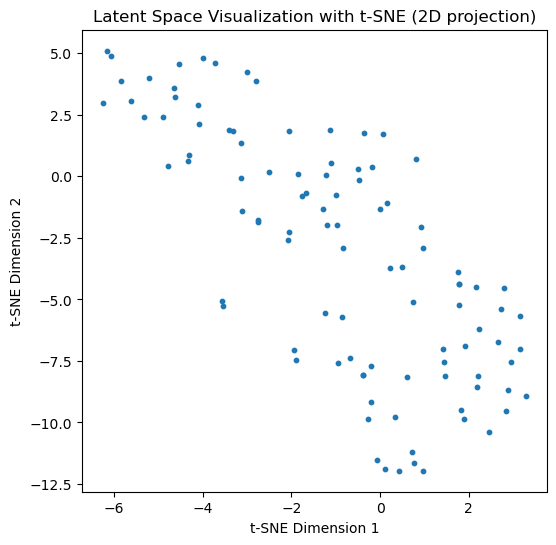

In [11]:
z_mean, z_log_var, z = vae.encoder.predict(gamma_test)
plot_latent_space_with_tsne(z_log_var)

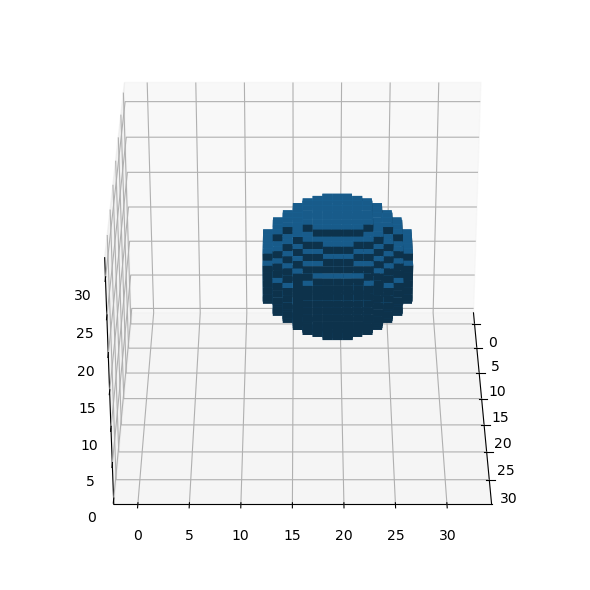

1/1 [==============================] - 0s 52ms/step


In [12]:
if ball:
    sgl_data = gen_voxel_ball_data(1, d=d)
else:
    sgl_data = gen_voxel_brick_data(1, d_xyz=d_xyz)
plot_voxel(sgl_data[0, :, :, :, 0], azim=0, elev=30)
z_mean, z_log_var, z = vae.encoder.predict(sgl_data)

1/1 [==============================] - 0s 206ms/step


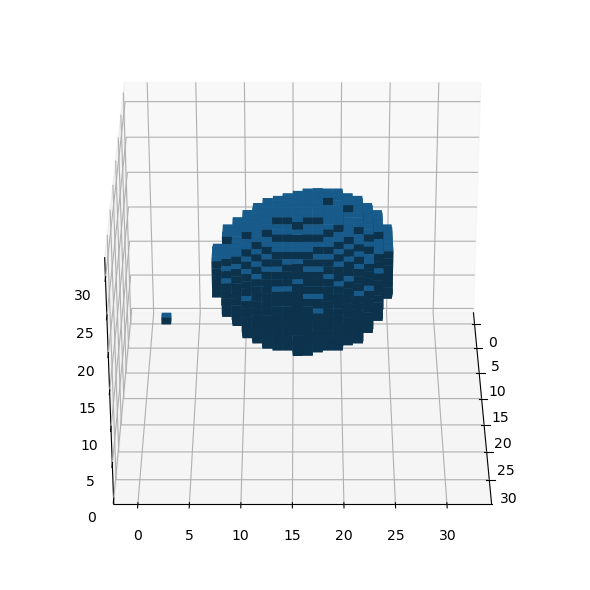

In [13]:
sgl_pred = vae.decoder.predict(z)
sgl_pred = np.squeeze(sgl_pred, axis=4)
sgl_pred = np.squeeze(sgl_pred, axis=0)
# sgl_pred = np.abs(np.round(sgl_pred))
sgl_pred = np.clip(sgl_pred, a_min=0, a_max=1)

plot_voxel(sgl_pred, azim=0, elev=30)

<StemContainer object of 3 artists>

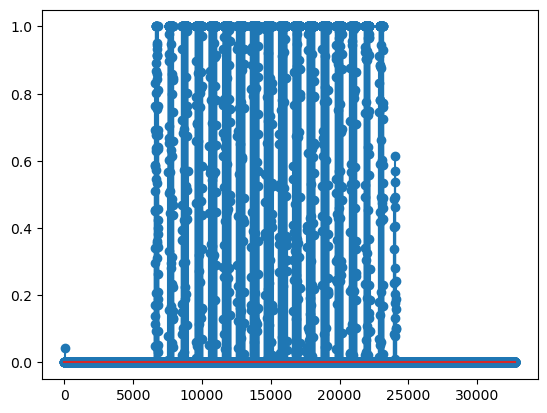

In [14]:
plt.stem(np.concatenate(np.concatenate(sgl_pred)))

In [15]:
vae.save_weights('models/vae_weights.h5')
vae.save("models/vae.keras")

/home/jath/.conda/envs/TF2_12/lib/python3.11/site-packages/keras/src/saving/saving_api.py:164: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


## Load VAE